In [12]:
import pandas as pd
from textblob import TextBlob



In [13]:
data = pd.read_pickle("../data/corpus.pkl")
data.shape

(2, 2)

### Sentiment analysis with TextBlob

In [14]:
# Get polarity and subjectivity from TextBlob
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data.content.apply(pol)
data['subjectivity'] = data.content.apply(sub)
data

,content,wing,polarity,subjectivity
left,hey we’ve got our first political sex scandal ...,left,0.081843,0.426088
right,her names nicolle and shes quite a troll nicol...,right,0.090313,0.459414


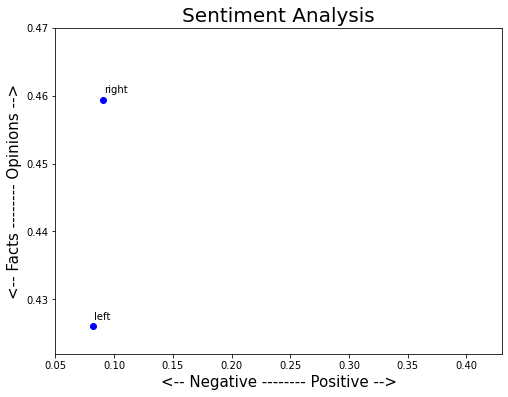

In [19]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 6]

for index, wing in enumerate(data.index):
    x = data.polarity.loc[wing]
    y = data.subjectivity.loc[wing]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['wing'][index], fontsize=10)
    plt.xlim(.050, .43) 
    plt.ylim(.422, .47) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()